In [3]:
#Lecture 1.1
#If X~N(0,1), estimate P(|sin(X)|>1/2)
using Random, Distributions #This allows us to access some commands relating to probability.
#You may need to add these packages if you don't have them already (using Pkg.add)
num = 0 #This will keep track of the number of times our event occurs.
sample_size = 100000 #Number of samples for our Monte Carlo simulation.
dist = Normal(0,1) #Generates a normal distribution to draw samples from
X = rand(dist,sample_size) #Generates the specified number of samples from our distribution.
for x in X #Go through all the samples, and check if |sin(X)|>1/2 occurs for each one.
    if abs(sin(x))>1/2
        num+=1
    end #if statements and loops require an 'end' to terminate them. Don't forget to include this!
end
println(num/sample_size) #Print out our computed probability

0.59316


In [1]:
#Lecture 2.1
#Generate pseudo random numbers in (0,1) with a Linear Congruential Generator
a =7^5 #Multiplier
m = 2^31 - 1 #Modulus.  
#Note 2^31-1 is a prime number known as a Mersenne prime.  Large prime numbers are often good choices
#for the multiplier.  Large powers of 2 are also sometimes chosen for computational reasons.
c = 0 #Increment.  0 is a nice choice since it means no addition is necessary, increasing algorithm speed
#The choices above are used in minstd, a pseudorandom number generator in C++.
X_0 = 6 #Seed for the algorithm.  Different seeds will yield different sequences of numbers.
seq_length = 10 #Number of values to generate
for i in 1:seq_length
    X_i = (a*X_0+c)%m #Computation of the next number in the sequence
    println(X_i/m) #Print normalized pseudorandom number
    X_0=X_i   
end

4.6958215556553665e-5
0.7892267288589975
0.5336319331701994
0.7519007915406957
0.19660342447301532
0.3137551179685421
0.28226769728691675
0.07318830120991371
0.07577843501967305
0.6081573756449657


Pi approximation: 3.096


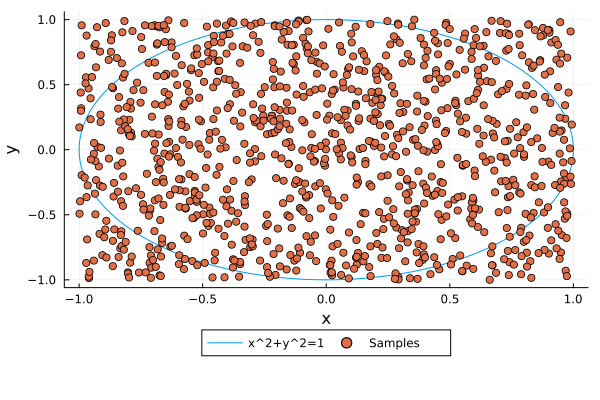

In [32]:
#Lecture 2.2
#Estimate the value of pi using Monte Carlo simulation
using Random, Distributions, Plots
dist = Uniform(-1,1)
sample_size = 1000
x=rand(dist,sample_size) #Generates a list of x coordinates uniformly distributed in (-1,1)
y=rand(dist,sample_size) #Generates a list of y coordinates uniformly distributed in (-1,1)
num = 0
for i in 1:sample_size
    if x[i]^2+y[i]^2<=1 #Point landed inside the unit circle
        num+=1
    end
end
prob_circle = num/sample_size #Monte Carlo estimate of probability of landing in the unit circle.
pi_approx = prob_circle*4 #Since P(in circle)=pi/4, can solve for pi.
println("Pi approximation: ",pi_approx)

#Now let's plot our results, if there aren't too many
if sample_size <= 1000
    #First plot the circle
    theta=0:1/100:2pi #List of angle values in (0,2pi)
    #Generate x and y coordinates on the circle
    x_circ = cos.(theta) #The dot indicates we apply the operation to all values in the list
    y_circ = sin.(theta)
    plot(x_circ,y_circ,label="x^2+y^2=1") #Plot unit circle
    plot!(legend=:outerbottom, legendcolumns=2)

    scatter!(x,y,xlabel="x",ylabel="y",label="Samples") #Plot all our data points on the same graph.
    #! is used to plot everything on the same graph.
end